# Explore here

In [1]:
# Your code here
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    366 non-null    datetime64[ns]
 1   sales   366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [5]:
df.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [6]:
df['date'] = df['date'].dt.date

In [7]:
df = df.set_index('date')
df

,sales
date,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633
...,...
2023-08-30,989.600354
2023-08-31,994.987326
2023-09-01,995.814415


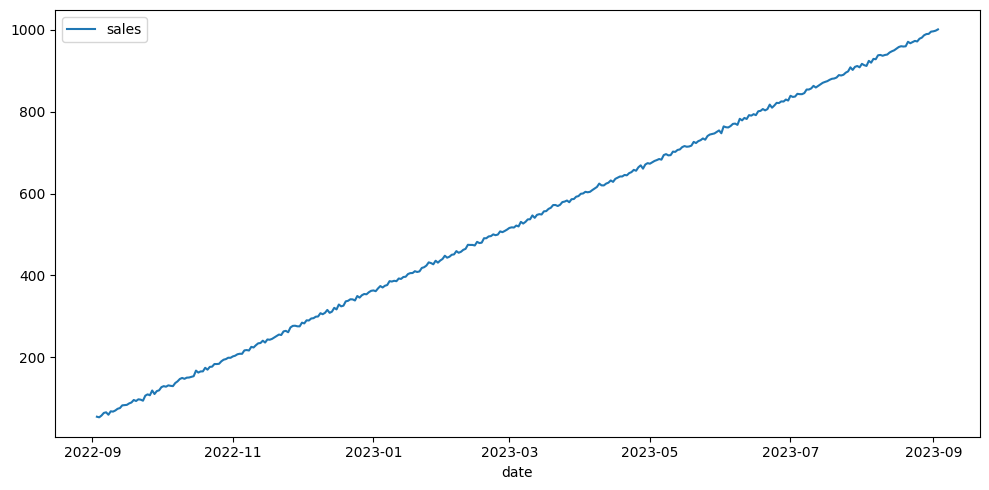

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(10,5))
sns.lineplot(data=df)

plt.tight_layout()
plt.show()

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposicion = seasonal_decompose(df,period = 30)


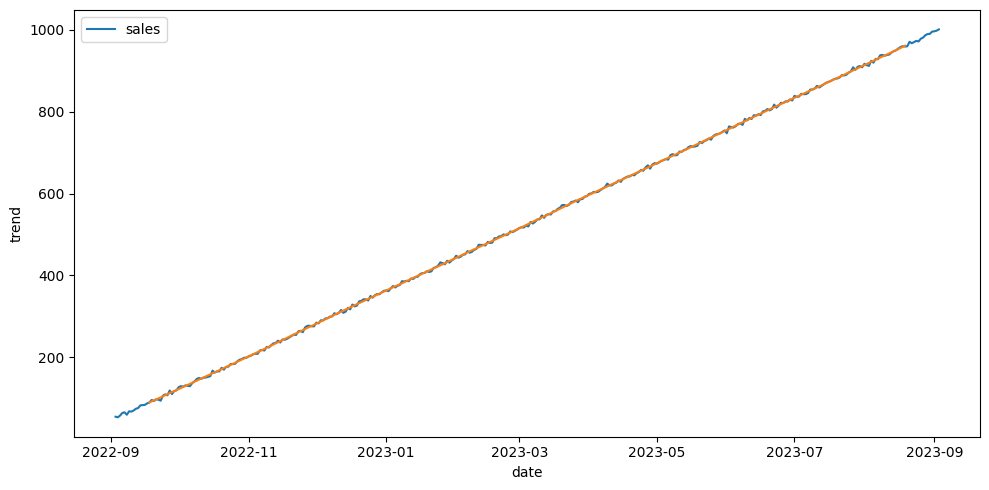

In [10]:
trend = decomposicion.trend

plt.subplots(figsize=(10,5))
sns.lineplot(data=df)
sns.lineplot(data=trend)

plt.tight_layout()
plt.show()

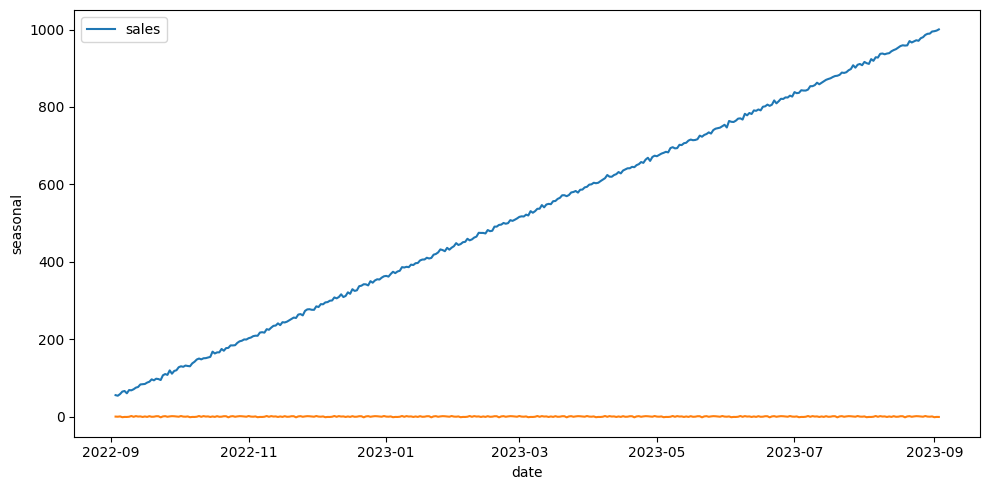

In [11]:
estacional = decomposicion.seasonal

plt.subplots(figsize=(10,5))
sns.lineplot(data=df)
sns.lineplot(data=estacional)

plt.tight_layout()
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(df)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

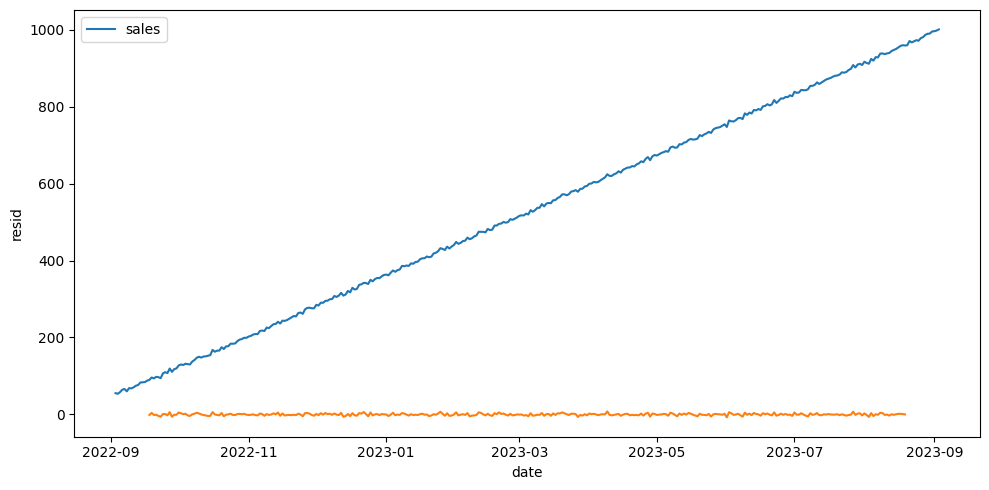

In [13]:
residuos = decomposicion.resid

plt.subplots(figsize=(10,5))
sns.lineplot(data=df)
sns.lineplot(data=residuos)

plt.tight_layout()
plt.show()

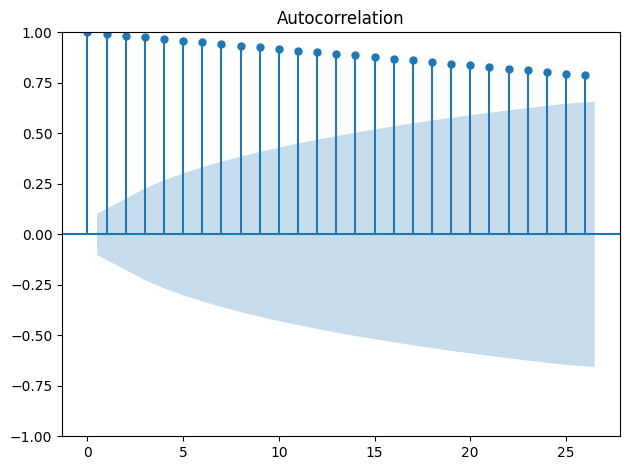

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df)
plt.tight_layout()
plt.show()

In [15]:
df_stationary = df.diff().dropna()
test_stationarity(df_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [16]:
from pmdarima import auto_arima

model = auto_arima(df_stationary,seasonal=True,trace=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1847.120, Time=4.10 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2096.542, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1972.854, Time=0.56 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2209.657, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1845.127, Time=0.95 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1843.049, Time=0.51 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1845.092, Time=1.50 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=1843.587, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=1841.533, Time=0.52 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=1843.434, Time=1.37 sec
 ARIMA(2,0,1)(0,0,1)[12] intercept   : AIC=1843.433, Time=1.34 sec
 ARIMA(2,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.76 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1839.553, Time=0.21 sec
 ARIMA(1,0,1)(1,0,0)[12] inte

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -915.776
Date:                Fri, 07 Jun 2024   AIC                           1839.553
Time:                        19:14:35   BIC                           1855.152
Sample:                    09-04-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
train_df = df_stationary[(df_stationary.index>pd.to_datetime('2023-07-25').date()) &(df_stationary.index<pd.to_datetime('2023-08-25').date())]
test_df = df_stationary[df_stationary.index>=pd.to_datetime('2023-08-25').date()]

In [19]:
train_df

,sales
date,
2023-07-26,3.066615
2023-07-27,9.845911
2023-07-28,-6.281532
2023-07-29,7.546623
2023-07-30,2.014523
2023-07-31,-3.205660
2023-08-01,8.489334
2023-08-02,-3.268661
2023-08-03,-1.823135


In [20]:
model = auto_arima(train_df,seasonal=True,trace=True,m=7)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=183.250, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=173.575, Time=0.03 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=188.874, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=172.192, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=173.063, Time=0.04 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=168.819, Time=0.03 sec
 ARIMA(2,0,0)(1,0,0)[7] intercept   : AIC=170.356, Time=0.09 sec
 ARIMA(2,0,0)(0,0,1)[7] intercept   : AIC=170.012, Time=0.06 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(3,0,0)(0,0,0)[7] intercept   : AIC=170.739, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=170.408, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.11 sec
 A

In [21]:
forecast = model.predict(10)

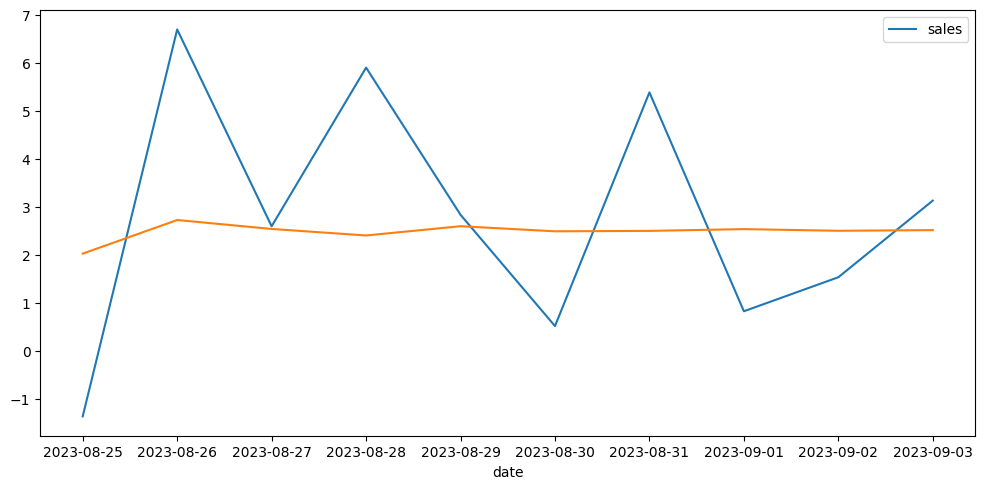

In [22]:
plt.subplots(figsize=(10,5))
sns.lineplot(data=test_df)
sns.lineplot(data=forecast)

plt.tight_layout()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error,r2_score

mean_squared_error(test_df,forecast)
r2_score(test_df,forecast)

0.061613889321949

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=1631.832, Time=1.39 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1860.586, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=1745.811, Time=0.11 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1960.074, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=1630.658, Time=0.75 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=1635.195, Time=0.42 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=1630.171, Time=1.01 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=1631.232, Time=1.79 sec
 ARIMA(1,1,2)(0,0,2)[7] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(2,1,1)(0,0,2)[7] intercept   : AIC=1628.177, Time=1.03 sec
 ARIMA(2,1,1)(0,0,1)[7] intercept   : AIC=1628.690, Time=0.76 sec
 ARIMA(2,1,1)(1,0,2)[7] intercept   : AIC=1624.378, Time=1.50 sec
 ARIMA(2,1,1)(1,0,1)[7] intercept   : AIC=1637.438, Time=0.80 sec
 ARIMA(2,1,1)(2,0,2)[7] intercept   : AIC=1627.419, Time=1.47 sec
 ARIMA(2,1,1)(2,0,1)

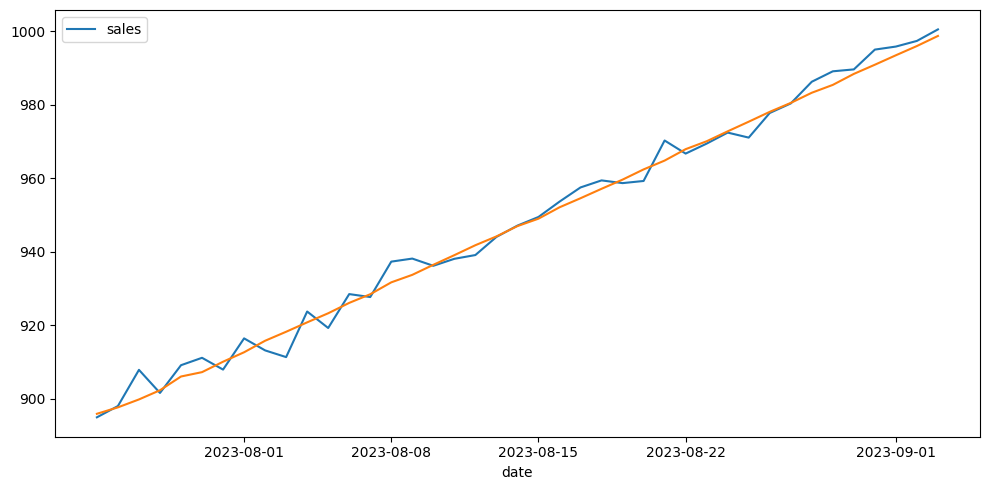

In [24]:
train_df = df[df.index<pd.to_datetime('2023-07-25').date()]
test_df = df[df.index>=pd.to_datetime('2023-07-25').date()]

model = auto_arima(train_df,seasonal=True,trace=True,m=7)
forecast = model.predict(len(test_df))

plt.subplots(figsize=(10,5))
sns.lineplot(data=test_df)
sns.lineplot(data=forecast)

plt.tight_layout()
plt.show()

In [26]:
mean_squared_error(test_df,forecast)

9.377647141488138

In [27]:
r2_score(test_df,forecast)


0.9902100012151559

In [28]:
from pickle import dump

dump(model,open('../models/model_serie_temporal1.model','wb'))